In this project on stock market prediction, we are going to train the dataset on the following models.

- Auto ARIMAX<br>
- Facebook Prophet<br>
- LightGBM<br>
- LSTM (coming soon)<br>

- Below two lines of code help to prevent any problems while reloading the same project 
- Third line of code helps to make visualization within the notebook

In [1]:
# INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Getting the required packages 

We first have to install the following packages using pip.
- package `pmdarima` for importing `auto_arima` module 
- prophet
- lightgbm 

In [2]:
#installing packages

#uncomment below if packages are not already installed in your machine
#!pip install pmdarima
#!pip install lightgbm
#!pip install prophet --no-cache-dir

A `!` mark is needed before `pip` for shell command. If you are installing it in your local machine from command line interface (CLI), then you don't need this exclamation (`!`) mark.  

In [1]:
# importing PACKAGES:

# data analysis
import numpy as np
import pandas as pd

#ML model training
from pmdarima import auto_arima
from prophet import Prophet
import lightgbm as lgb

#evaluation metric
from sklearn.metrics import mean_absolute_error, mean_squared_error

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

Importing plotly failed. Interactive plots will not work.


# 2. Getting the dataset

- For link to the dataset: [Click here](https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data?select=ICICIBANK.csv).<br>

- Above dataset contains stocks of 50 companies listed in NIFTY 50. The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange. 

- For this project, we are using data corresponding to only one company: ICICIBANK. 

- I have downloaded the dataset on my local directory manually. You can get the dataset from the link above or, from this github repo. 

In [4]:
# make sure dataset with -csv extension is there in the directory
!ls

ICICIBANK.csv  LICENSE	README.md  stock-market-prediction.ipynb


In [2]:
#1. use read_csv function from pandas libraray to read the dataset 
#2. store contents of the file in a DataFrame object df
df = pd.read_csv("ICICIBANK.csv")

In [3]:
#print first 5 rows of the dtatset
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


In the above dataset, 
- `Date` is in yyyy-mm-dd format
- Symobol is symbol of the company in the stock exchange. In our case, it is `ICICIBANK`
- VWAP (Volume Weighted Average Price) is the target variable to predict. VWAP is a trading indicator used in the stock market to measure the average price of a stock over a given period of time, weighted by volume of shares traded during that period.

## 3. Getting to know the dataset

In [7]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,5.508954e+02,3.687841e+02,6.740000e+01,2.675625e+02,3.980750e+02,8.735625e+02,1.794100e+03
Open,5306.0,5.515585e+02,3.688910e+02,6.700000e+01,2.674000e+02,3.990000e+02,8.770000e+02,1.767050e+03
High,5306.0,5.605586e+02,3.740797e+02,7.045000e+01,2.719125e+02,4.065250e+02,8.887750e+02,1.798150e+03
Low,5306.0,5.415342e+02,3.633897e+02,6.600000e+01,2.636250e+02,3.924500e+02,8.598000e+02,1.760150e+03
Last,5306.0,5.510510e+02,3.687056e+02,6.700000e+01,2.674000e+02,3.987000e+02,8.746000e+02,1.793000e+03
Close,5306.0,5.509955e+02,3.687254e+02,6.740000e+01,2.676125e+02,3.981750e+02,8.735625e+02,1.794100e+03
VWAP,5306.0,5.511290e+02,3.687469e+02,6.852000e+01,2.675775e+02,3.982350e+02,8.735100e+02,1.783460e+03
Volume,5306.0,8.224631e+06,1.218535e+07,7.409000e+03,9.612055e+05,3.486648e+06,1.157202e+07,2.868577e+08
Turnover,5306.0,3.759336e+14,4.759238e+14,9.617283e+10,3.459444e+13,2.923010e+14,4.993528e+14,1.461959e+16
Trades,2456.0,1.383676e+05,9.900873e+04,2.595000e+03,7.931225e+04,1.101010e+05,1.629535e+05,9.498910e+05


In [9]:
df.shape

(5306, 15)

In [10]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


In [11]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,ICICIBANK,EQ,569.95,602.00,605.50,588.0,588.7,591.10,596.22,62584522,3.731429e+15,546696.0,16913351.0,0.2702
5302,2021-04-27,ICICIBANK,EQ,591.10,593.25,601.95,591.1,599.0,598.75,597.63,24239685,1.448630e+15,233412.0,9056247.0,0.3736
5303,2021-04-28,ICICIBANK,EQ,598.75,598.00,622.80,598.0,619.7,621.35,612.57,33292864,2.039422e+15,295406.0,14011476.0,0.4209
5304,2021-04-29,ICICIBANK,EQ,621.35,622.55,628.45,609.0,621.0,621.45,619.55,34537860,2.139792e+15,304029.0,10324897.0,0.2989
5305,2021-04-30,ICICIBANK,EQ,621.45,610.10,616.35,598.1,599.7,600.50,607.02,23653258,1.435801e+15,247055.0,7292392.0,0.3083


Thus we have have datas from 2000-01-03 to 2021-04-30 in 5306 rows.

In [12]:
from datetime import date
date(2021, 4, 30)- date(2000, 1, 3)

datetime.timedelta(days=7788)

Thus we have 7788 days in between these days and we have 5306 rows corresponding to each days. Public holidays are not there.

In [13]:
2021-2000

21

We have about 21 years of data. We'll divide this dataset into train, test and validation. 

# 3. Splitting the dataset 

**REMEMBER** We don't shuffle data in time-series, because if we shuffle, then the model may know the future data by mistake.

Splitting the data into train, validation and test (60/20/20) along with features.<br>
- train: from 2000 to 2012<br>
- valid: from 2013 to 2016<br>
- test: from 2017 to 2021<br>
- full_train: from 2000 to 2016<br>

In [15]:
df_train = df[df.Date < "2013"]
df_full_train = df[df.Date < "2017"]
df_test = df[df.Date >= "2017"]
df_val = df_full_train[df_full_train.Date >= "2013"]

In [22]:
len(df_train), len(df_test), len(df_val),len(df_full_train)

(3246, 1071, 989, 4235)

## 4. EDA on training dataset

Let's plot the target variable `VWAP` over time

<AxesSubplot: >

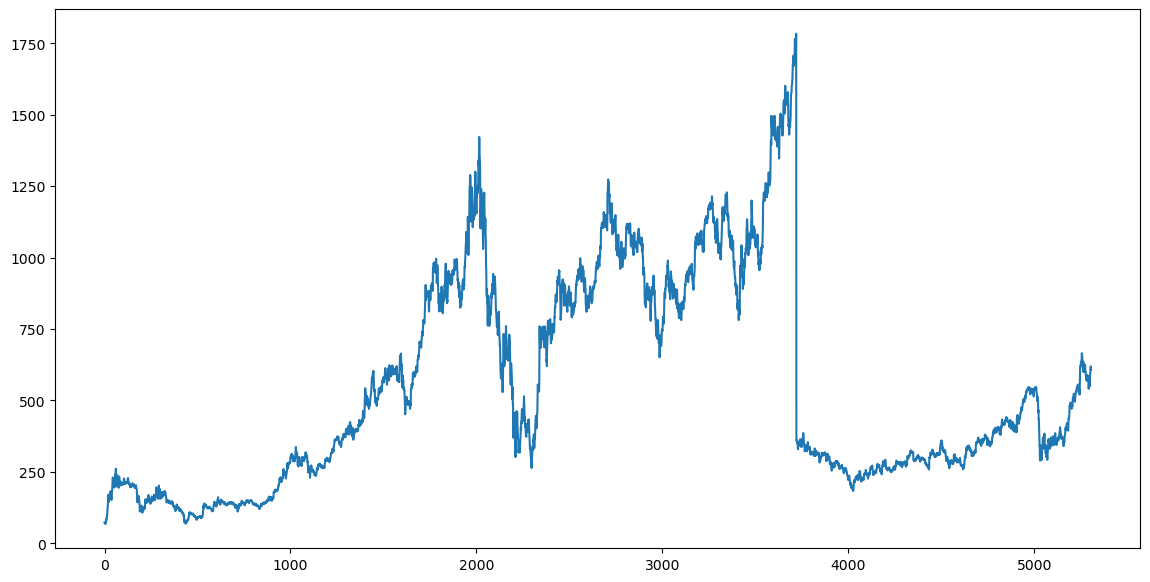

In [14]:
df.VWAP.plot(figsize=(14, 7))

In the above plot X-axis is along indices. It would be better to visualize with date. For this let's change indices into date and then plot again. 

In [15]:
#set the DataFrame's index to the "Date" column
#keep the Date column in the DataFrame
#inplace=True modifies the DataFrame in place instead of returning a new one.
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
2000-01-04,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2000-01-05,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
2000-01-06,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
2000-01-07,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


<AxesSubplot: xlabel='Date'>

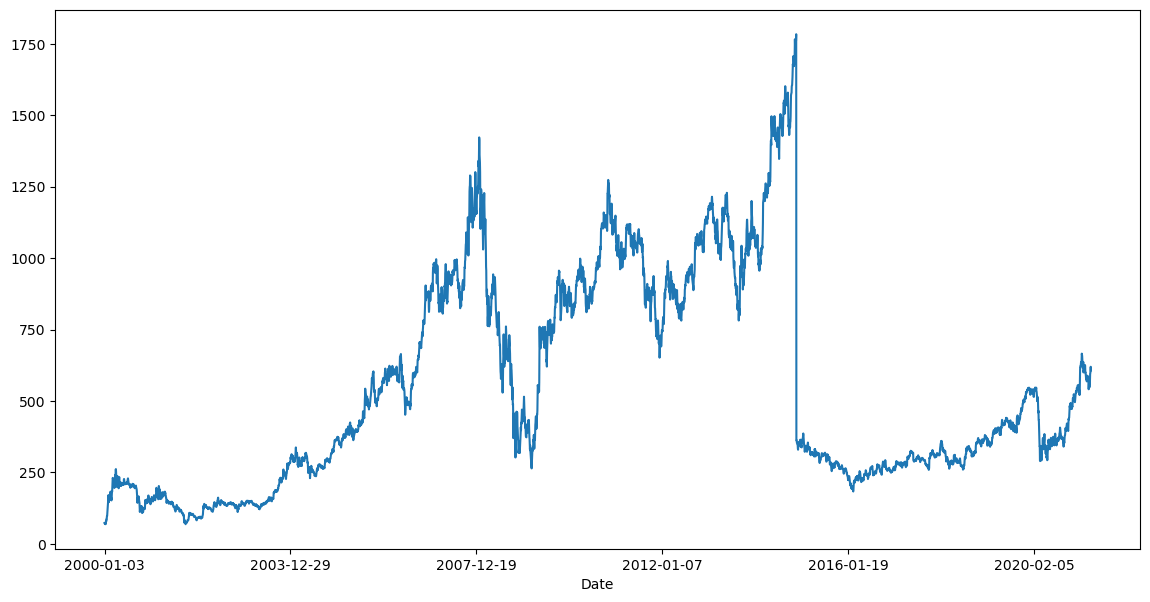

In [17]:
df.VWAP.plot(figsize=(14, 7))

# Feature Engineering

- Almost every time series problem have some external features or some internal feature engineering to help the model.

- Let's add some basic features like lag values of available numeric features that are widely used for time series problems. Since we need to predict the price of the stock for a day, we cannot use the feature values of the same day since they will be unavailable at actual inference time. We need to use statistics like mean, standard deviation of their lagged values.

- We will use three sets of lagged values, one previous day, one looking back 7 days and another looking back 30 days as a proxy for last week and last month metrics.

In [9]:
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

/tmp/ipykernel_10931/3041336890.py:28: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [11]:
df.set_index("Date", drop=False, inplace=True)
df.head().T

Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Symbol,ICICIBANK,ICICIBANK,ICICIBANK,ICICIBANK,ICICIBANK
Series,EQ,EQ,EQ,EQ,EQ
Prev Close,69.2,74.75,73.05,69.5,70.05
Open,74.35,73.05,70.0,71.0,69.0
High,74.75,78.5,73.5,74.0,72.5
Low,71.4,71.0,67.5,69.55,66.0
Last,74.75,73.25,70.0,69.75,67.0
Close,74.75,73.05,69.5,70.05,67.4
VWAP,73.2,73.38,70.85,72.04,68.72


For boosting models, it is very useful to add datetime features like hour, day, month, as applicable to provide the model information about the time component in the data. For time series models it is not explicitly required to pass this information but we could do so and we will in this notebook so that all models are compared on the exact same set of features.

In [14]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek

/tmp/ipykernel_10931/3418294028.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df.Date.dt.week


In [17]:


exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

The additional features supplied to time series problems are called exogenous regressors.

Auto ARIMAX

ARIMA (Auto Regressive Integrated Moving Average) models explain a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

ARIMA models require certain input parameters: p for the AR(p) part, q for the MA(q) part and d for the I(d) part. Thankfully, there is an automatic process by which these parameters can be chosen which is called Auto ARIMA.

When exogenous regressors are used with ARIMA it is commonly called ARIMAX.

Read more about ARIMA: https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

In [18]:
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=43971.314, Time=3.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=43981.939, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43970.791, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43970.824, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=43979.967, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=43972.789, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43972.791, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=43974.791, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=43968.815, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=43970.813, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=43970.815, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=43968.849, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=43972.816, Time=0.20 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 6.189 seconds


/home/bsarma/Downloads/ENTER/envs/stock-market/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/tmp/ipykernel_10931/395220638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Forecast_ARIMAX"] = forecast


The best ARIMA model is ARIMA(1, 1, 0) which has the lowest AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion).


<AxesSubplot: xlabel='Date'>

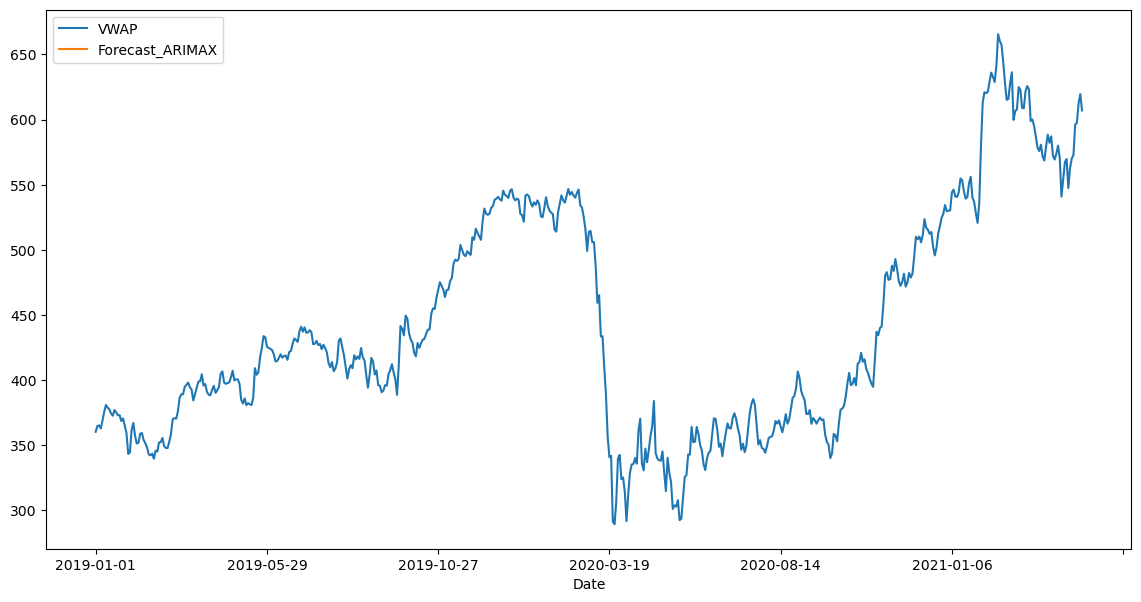

In [19]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [20]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("ab\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))

ValueError: Input contains NaN.

The Auto ARIMAX model seems to do a fairly good job in predicting the stock price given data till the previous day. Can other models beat this benchmark?

**Facebook Prophet**

Prophet is an open-source time series model developed by Facebook. It was released in early 2017. An exerpt from the homepage:

    Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Read more about Prophet: https://facebook.github.io/prophet/

I also shared a starter code Prophet's Prophecy for using Prophet in the ASHRAE competition on Kaggle.

Note that the default parameters are used for Prophet. They can be tuned to improve the results.

In [21]:
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(df_train[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds", "VWAP": "y"}))

forecast = model_fbp.predict(df_valid[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds"}))
df_valid["Forecast_Prophet"] = forecast.yhat.values

11:13:46 - cmdstanpy - INFO - Chain [1] start processing
11:13:52 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_10931/3244663224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Forecast_Prophet"] = forecast.yhat.values


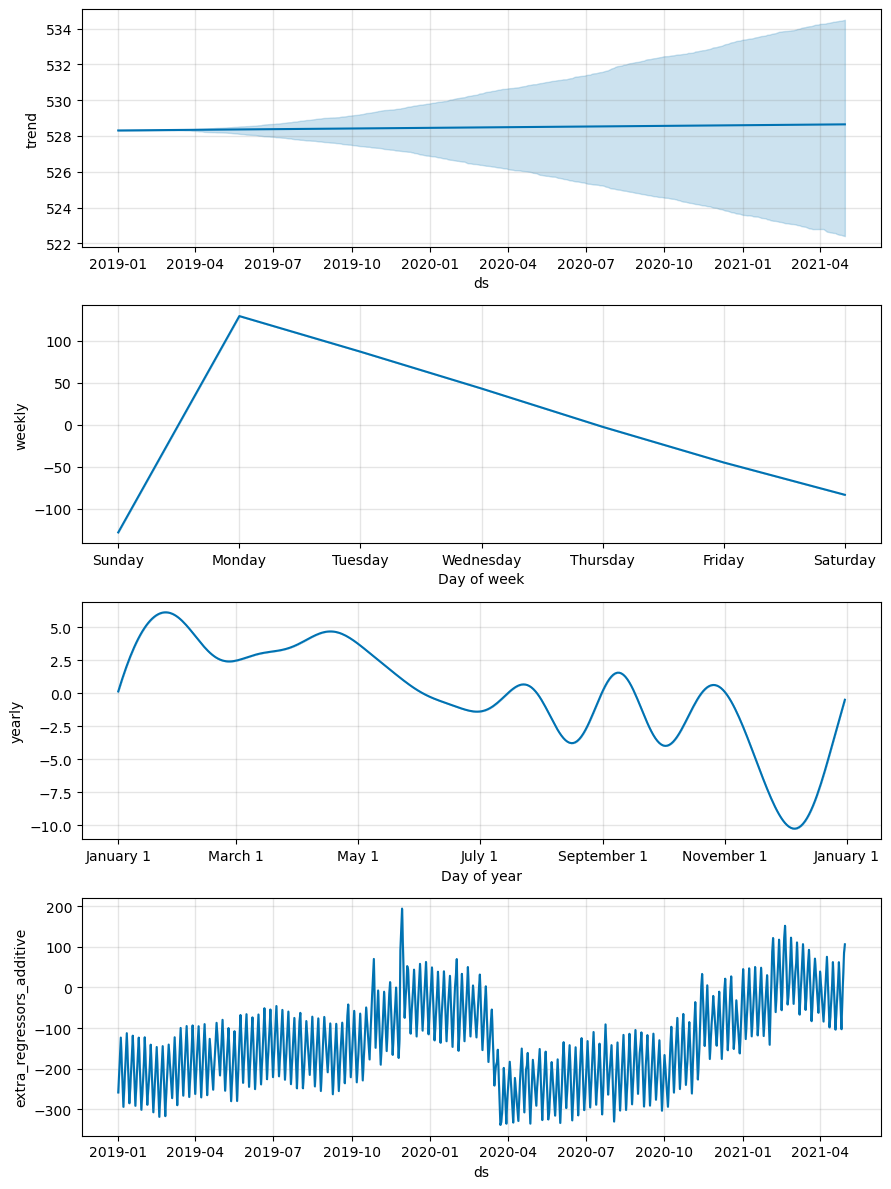

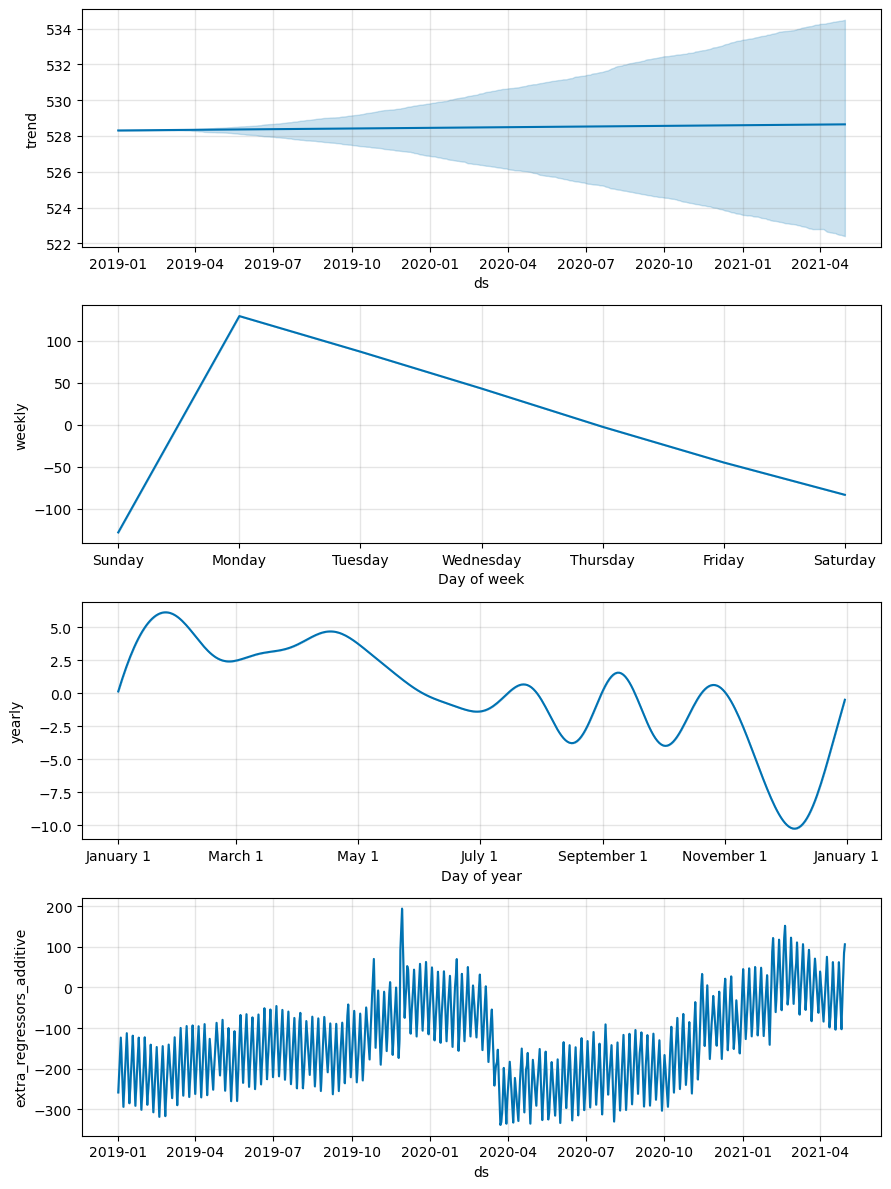

In [22]:
model_fbp.plot_components(forecast)

<AxesSubplot: xlabel='Date'>

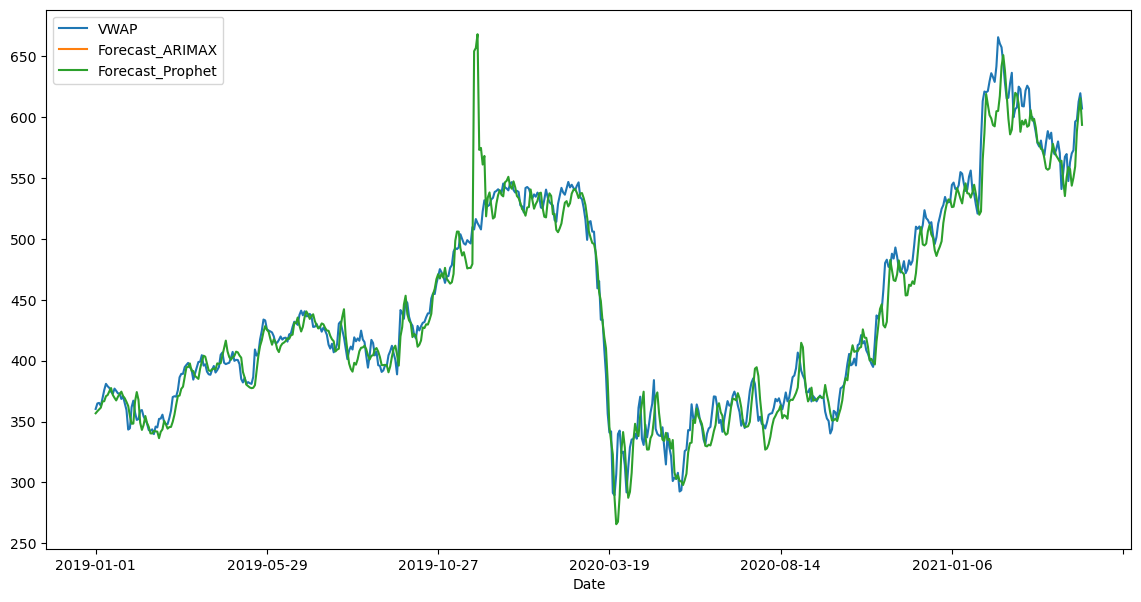

In [23]:
df_valid[["VWAP", "Forecast_ARIMAX", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [24]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("RMSE of Prophet:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_Prophet)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))
print("MAE of Prophet:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_Prophet))

ValueError: Input contains NaN.

**LightGBM**

Time series problems are popularly converted into a tabular i.i.d. structure and fed into boosting models like [LightGBM](https://lightgbm.readthedocs.io/en/latest/) and [XGBoost](https://xgboost.readthedocs.io/en/latest/).

There is loss of information in terms of knowing the order of data points in the time series but it can be circumvented by the datetime features to capture this information to some extent.

Note that the default parameters are used for LightGBM. They can be tuned to improve the results.

In [25]:
params = {"objective": "regression"}

dtrain = lgb.Dataset(df_train[exogenous_features], label=df_train.VWAP.values)
dvalid = lgb.Dataset(df_valid[exogenous_features])

model_lgb = lgb.train(params, train_set=dtrain)

forecast = model_lgb.predict(df_valid[exogenous_features])
df_valid["Forecast_LightGBM"] = forecast

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7756
[LightGBM] [Info] Number of data points in the train set: 4729, number of used features: 34
[LightGBM] [Info] Start training from score 564.599928


/tmp/ipykernel_10931/910916039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Forecast_LightGBM"] = forecast


<AxesSubplot: xlabel='Date'>

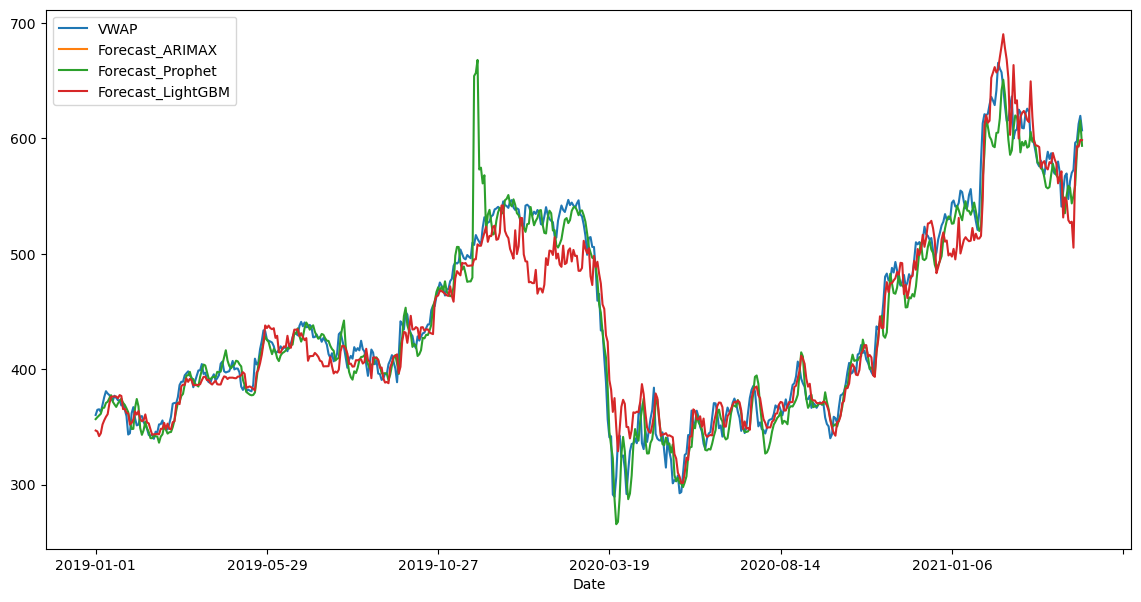

In [26]:
df_valid[["VWAP", "Forecast_ARIMAX", "Forecast_Prophet", "Forecast_LightGBM"]].plot(figsize=(14, 7))

In [27]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("RMSE of Prophet:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_Prophet)))
print("RMSE of LightGBM:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_LightGBM)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))
print("MAE of Prophet:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_Prophet))
print("MAE of LightGBM:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_LightGBM))

ValueError: Input contains NaN.



LightGBM performs terribly! This is a very important aspect of using boosting models for time series. Remember that boosting models are constrained to predict within the range of target values appearing in the training data. The maximum price value in the training data is ~ 7100 and hence LGBM is unable to predict values beyond 7100.

Then why are boosting methods still so popular? Well, they fail only in cases where the trend component is extremely strong and there are a wide variety of use cases where the trend is weak and the expected forecasts are within the values of the past. Stock prices is an example that generally has strong trend components especially when measured over years.

One method of improving i.i.d. based models is to model the differential target variable after removing the trend and making the time series stationary. We will look at this process along with an example of using a deep learning model (LSTM) to build a time series solution.

Will be updated soon.


Conclusions and Tips


    - Auto ARIMAX is a great baseline model but newer algorithms like Facebook's Prophet are extremely powerful and are getting cleverer by the day. Don't feel afraid to try out new techniques.
    - Setting up an appropriate validation framework is extremely important. It enables you to try and experiment various models and objectively compare them.
    - Lag-based features are very useful in providing trends information about the time series data. Rolling statistics are a common way of generating these.
    - Exogenous regressors help in providing external information about the time series. They tend to be very important in most models.
    - Boosting models like LightGBM are constrained to predict within the range of values of the target variable in the training data and don't extrapolate when there is strong trend.
    - Converting a time series to stationary and then modelling is a common approach for building solutions and can significantly improve results.


**References**:

1. [A modern Time Series tutorial](https://www.kaggle.com/code/rohanrao/a-modern-time-series-tutorial)